# Loading Libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Exploratory Analysis
### Loading data set "House Sale in King County, USA"

In [96]:
df=pd.read_csv("/content/kc_house_data.csv")
print('There are ',df.shape[0], 'rows and', df.shape[1], 'columns in the dataset')
df.head()


There are  21613 rows and 21 columns in the dataset


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [97]:
print('There are ',df.dtypes.unique().shape[0], 'different data types in the dataset')
df.dtypes

There are  3 different data types in the dataset


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [98]:
print('There are ',df['id'].duplicated().sum(), 'duplicated values in id row')
df[df['id'].duplicated()]

There are  177 duplicated values in id row


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [99]:
df.drop_duplicates('id',inplace=True) # Remove duplicate rows
print('After dropping the duplicatest there are ',df.shape[0], 'rows and', df.shape[1], 'columns in the dataset')

After dropping the duplicatest there are  21436 rows and 21 columns in the dataset


In [100]:
# Dropping unused columns.
df.drop(columns=['id', 'date'], inplace=True)


In [101]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143600e+04,21436.000000,21436.000000,21436.000000,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,5.405293e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,0.007604,0.235118,3.410384,7.661737,1790.960440,291.744495,1971.098433,84.729800,98077.862288,47.560156,-122.213697,1988.314378,12785.961280
std,3.676893e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,0.086871,0.767092,0.650235,1.174256,829.026491,442.781983,29.385277,402.431012,53.469371,0.138601,0.140896,685.699093,27375.467469
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.221500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [102]:
df.isnull().any().sum() # Finding number of null values

0

In [103]:
df.isna().any().sum() # Finding number of NA values

0

There are no null/NA values in the dataset

### Count of Houses with corresponding Floor Counts

<Axes: ylabel='floors'>

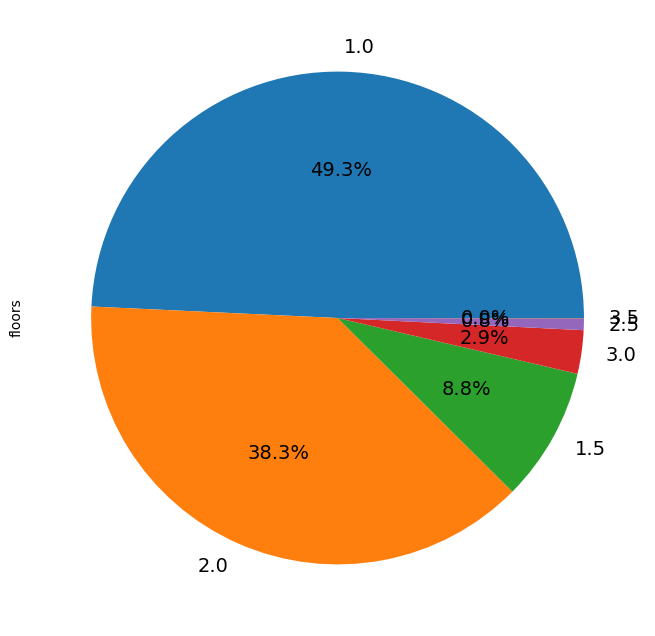

In [104]:
floor_count = df['floors'].value_counts().to_frame()
floor_count.plot(kind='pie',y='floors',legend=False,figsize=(8,8),autopct='%1.1f%%',textprops={'fontsize': 14})

The number of houses with 1 floor and 2 floors are the highest amoung the lot.

###  Count of Houses with corresponding Bedroom counts

<Axes: >

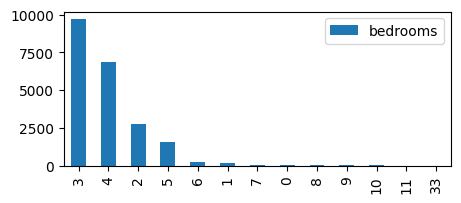

In [105]:
bedrooms_count = df['bedrooms'].value_counts().to_frame()
bedrooms_count.plot(kind='bar',figsize=(5,2))

The number of houses with 3 bedrooms are the highest followed by houses having 4 bedrooms and then by houses having 2 bedrooms.

## Count of Houses with corresponding Bathroom counts

<Axes: >

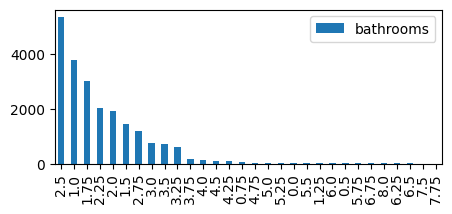

In [106]:
bathrooms_count = df['bathrooms'].value_counts().to_frame()
bathrooms_count.plot(kind='bar',figsize=(5,2))

The number of houses with 2.5 bathromms are the highest.

### Count of Houses with corresponding condition

<Axes: >

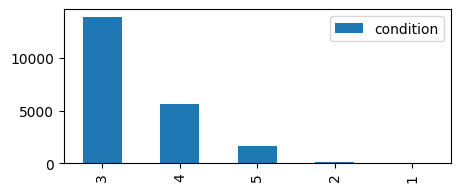

In [107]:
condition_count = df['condition'].value_counts().to_frame()
condition_count.plot(kind='bar',figsize=(5,2))

The result is quite obvious that the number of houses should be more for the best condition rating for sale. But we see that the houses rated 3 for their condition are the highest followed by 4 and then 5.

### Average Price of Houses according to year built

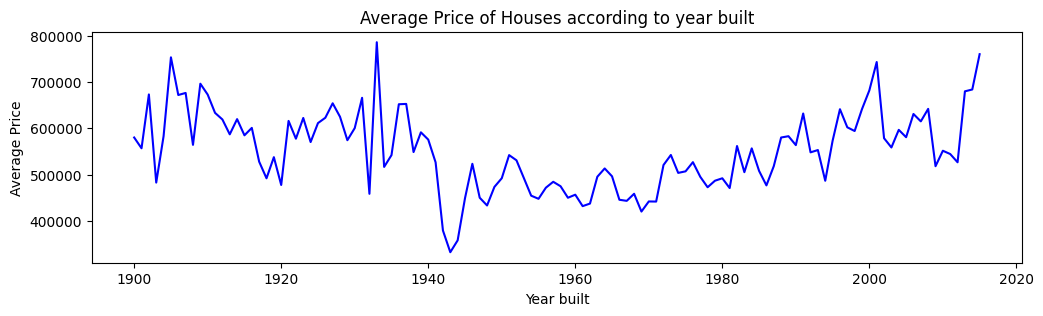

In [108]:
price_yr_built =df.groupby('yr_built')['price'].mean().sort_index().to_frame()

fig = plt.figure(figsize = (12, 3))
# Creating the bar plot
plt.plot(price_yr_built.index, price_yr_built['price'], color ='blue')
plt.xlabel("Year built")
plt.ylabel("Average Price")
plt.title("Average Price of Houses according to year built")
plt.show()

This plot gives a quick review of the average prices of the houses by their built year. We can observe that the average price for the houses built between the period 1900-1940 are highest compared to the period between 1940-1990, beyond which till present day the average price have increased.

### Average price of Houses according to Condition.

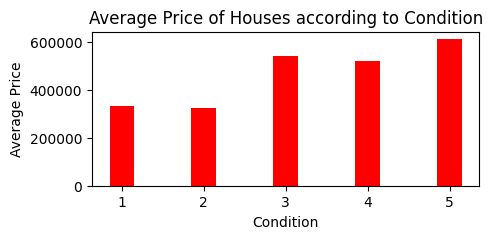

In [109]:
price_condition =df.groupby('condition')['price'].mean().sort_index().to_frame()

fig = plt.figure(figsize = (5, 2))
# Creating the bar plot
plt.bar(price_condition.index, price_condition['price'], color ='red',
        width = 0.3)
plt.xlabel("Condition")
plt.ylabel("Average Price")
plt.title("Average Price of Houses according to Condition")
plt.show()

As obvious we can observe that the average prices of the houses increases with their condition.

### Average price of Houses according to zip code

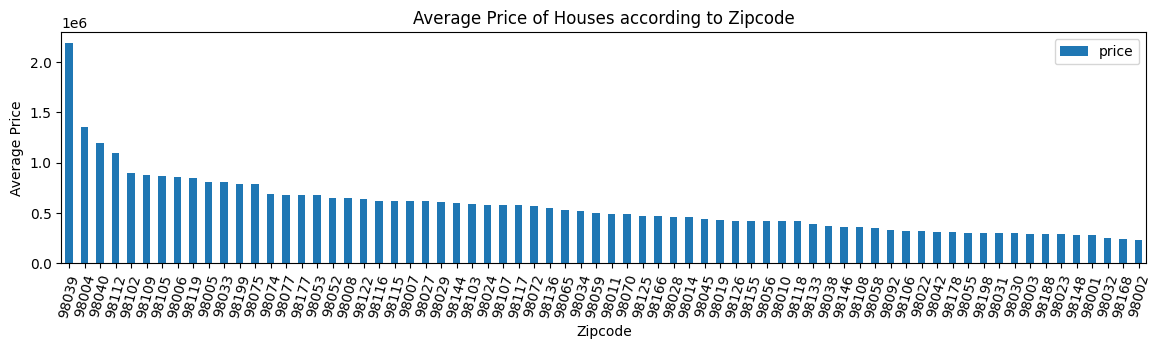

In [110]:
df.groupby('zipcode')['price'].mean().sort_values(
    ascending=False).to_frame().plot(kind="bar",figsize=(14,3))

plt.xticks(rotation=75,fontsize=10)
plt.xlabel("Zipcode")
plt.ylabel("Average Price")
plt.title("Average Price of Houses according to Zipcode")
plt.show()

The above plot provides the average house price with respect to zipcodes. It shows that the houses in location with zipcode 98039 is very expensive.

### Creating box plots of price grouping by grade, condition and waterfront features.

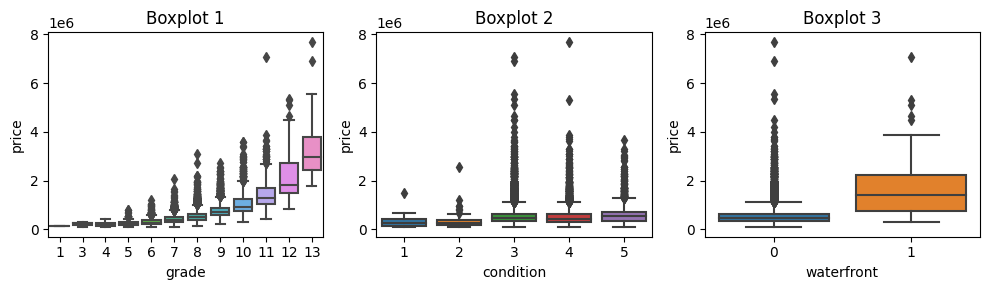

In [111]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Plot the first boxplot
sns.boxplot(x='grade', y='price', data=df,ax=axes[0])
axes[0].set_title('Boxplot 1')

# Plot the second boxplot
sns.boxplot(x='condition', y='price', data=df,ax=axes[1])
axes[1].set_title('Boxplot 2')

# Plot the third boxplot
sns.boxplot(x='waterfront', y='price', data=df,ax=axes[2])
axes[2].set_title('Boxplot 3')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Boxplots shows the distribution of the prices with respect to each cluster. Italso shows outlier values. We can observe a large amount of outliers present in almost all clusters/sections/groups.

### Creating box plots of price grouping by bedroom, bathroom and floors features.

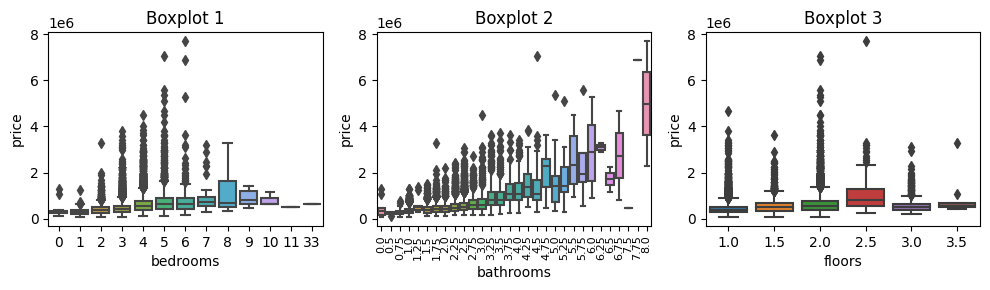

In [112]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Plot the first boxplot
sns.boxplot(x='bedrooms', y='price', data=df,ax=axes[0])
axes[0].set_title('Boxplot 1')

# Plot the second boxplot
sns.boxplot(x='bathrooms', y='price', data=df,ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90,fontsize=8)
axes[1].set_title('Boxplot 2')

# Plot the third boxplot
sns.boxplot(x='floors', y='price', data=df,ax=axes[2])
axes[2].set_title('Boxplot 3')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

We can see similar presence of price outliers in each groups of bedrooms, bathromms and floors.

### Boxplot for House price grouped by year built

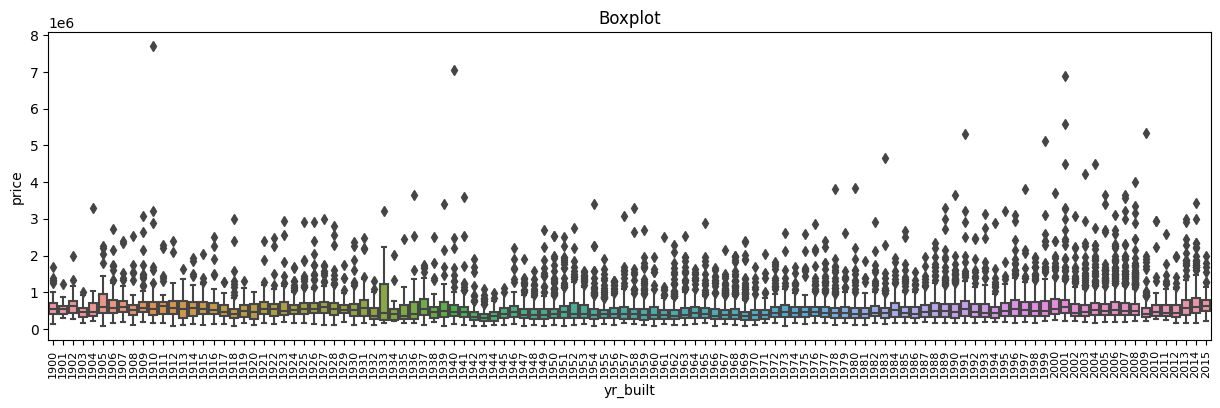

In [113]:
#Plotting the Boxplot for Yr_Built
plt.figure(figsize=(15,4))
sns.boxplot(x='yr_built', y='price', data=df)
plt.xticks(rotation=90,fontsize=8)
plt.title("Boxplot")
plt.show()

From the plots its clear that the dataset has many outlier values for each goups in every grouped sections.

### Create a series of Sctter plots for the selected features excluding categorical features to see their relationship among them.

<Figure size 1000x1000 with 0 Axes>

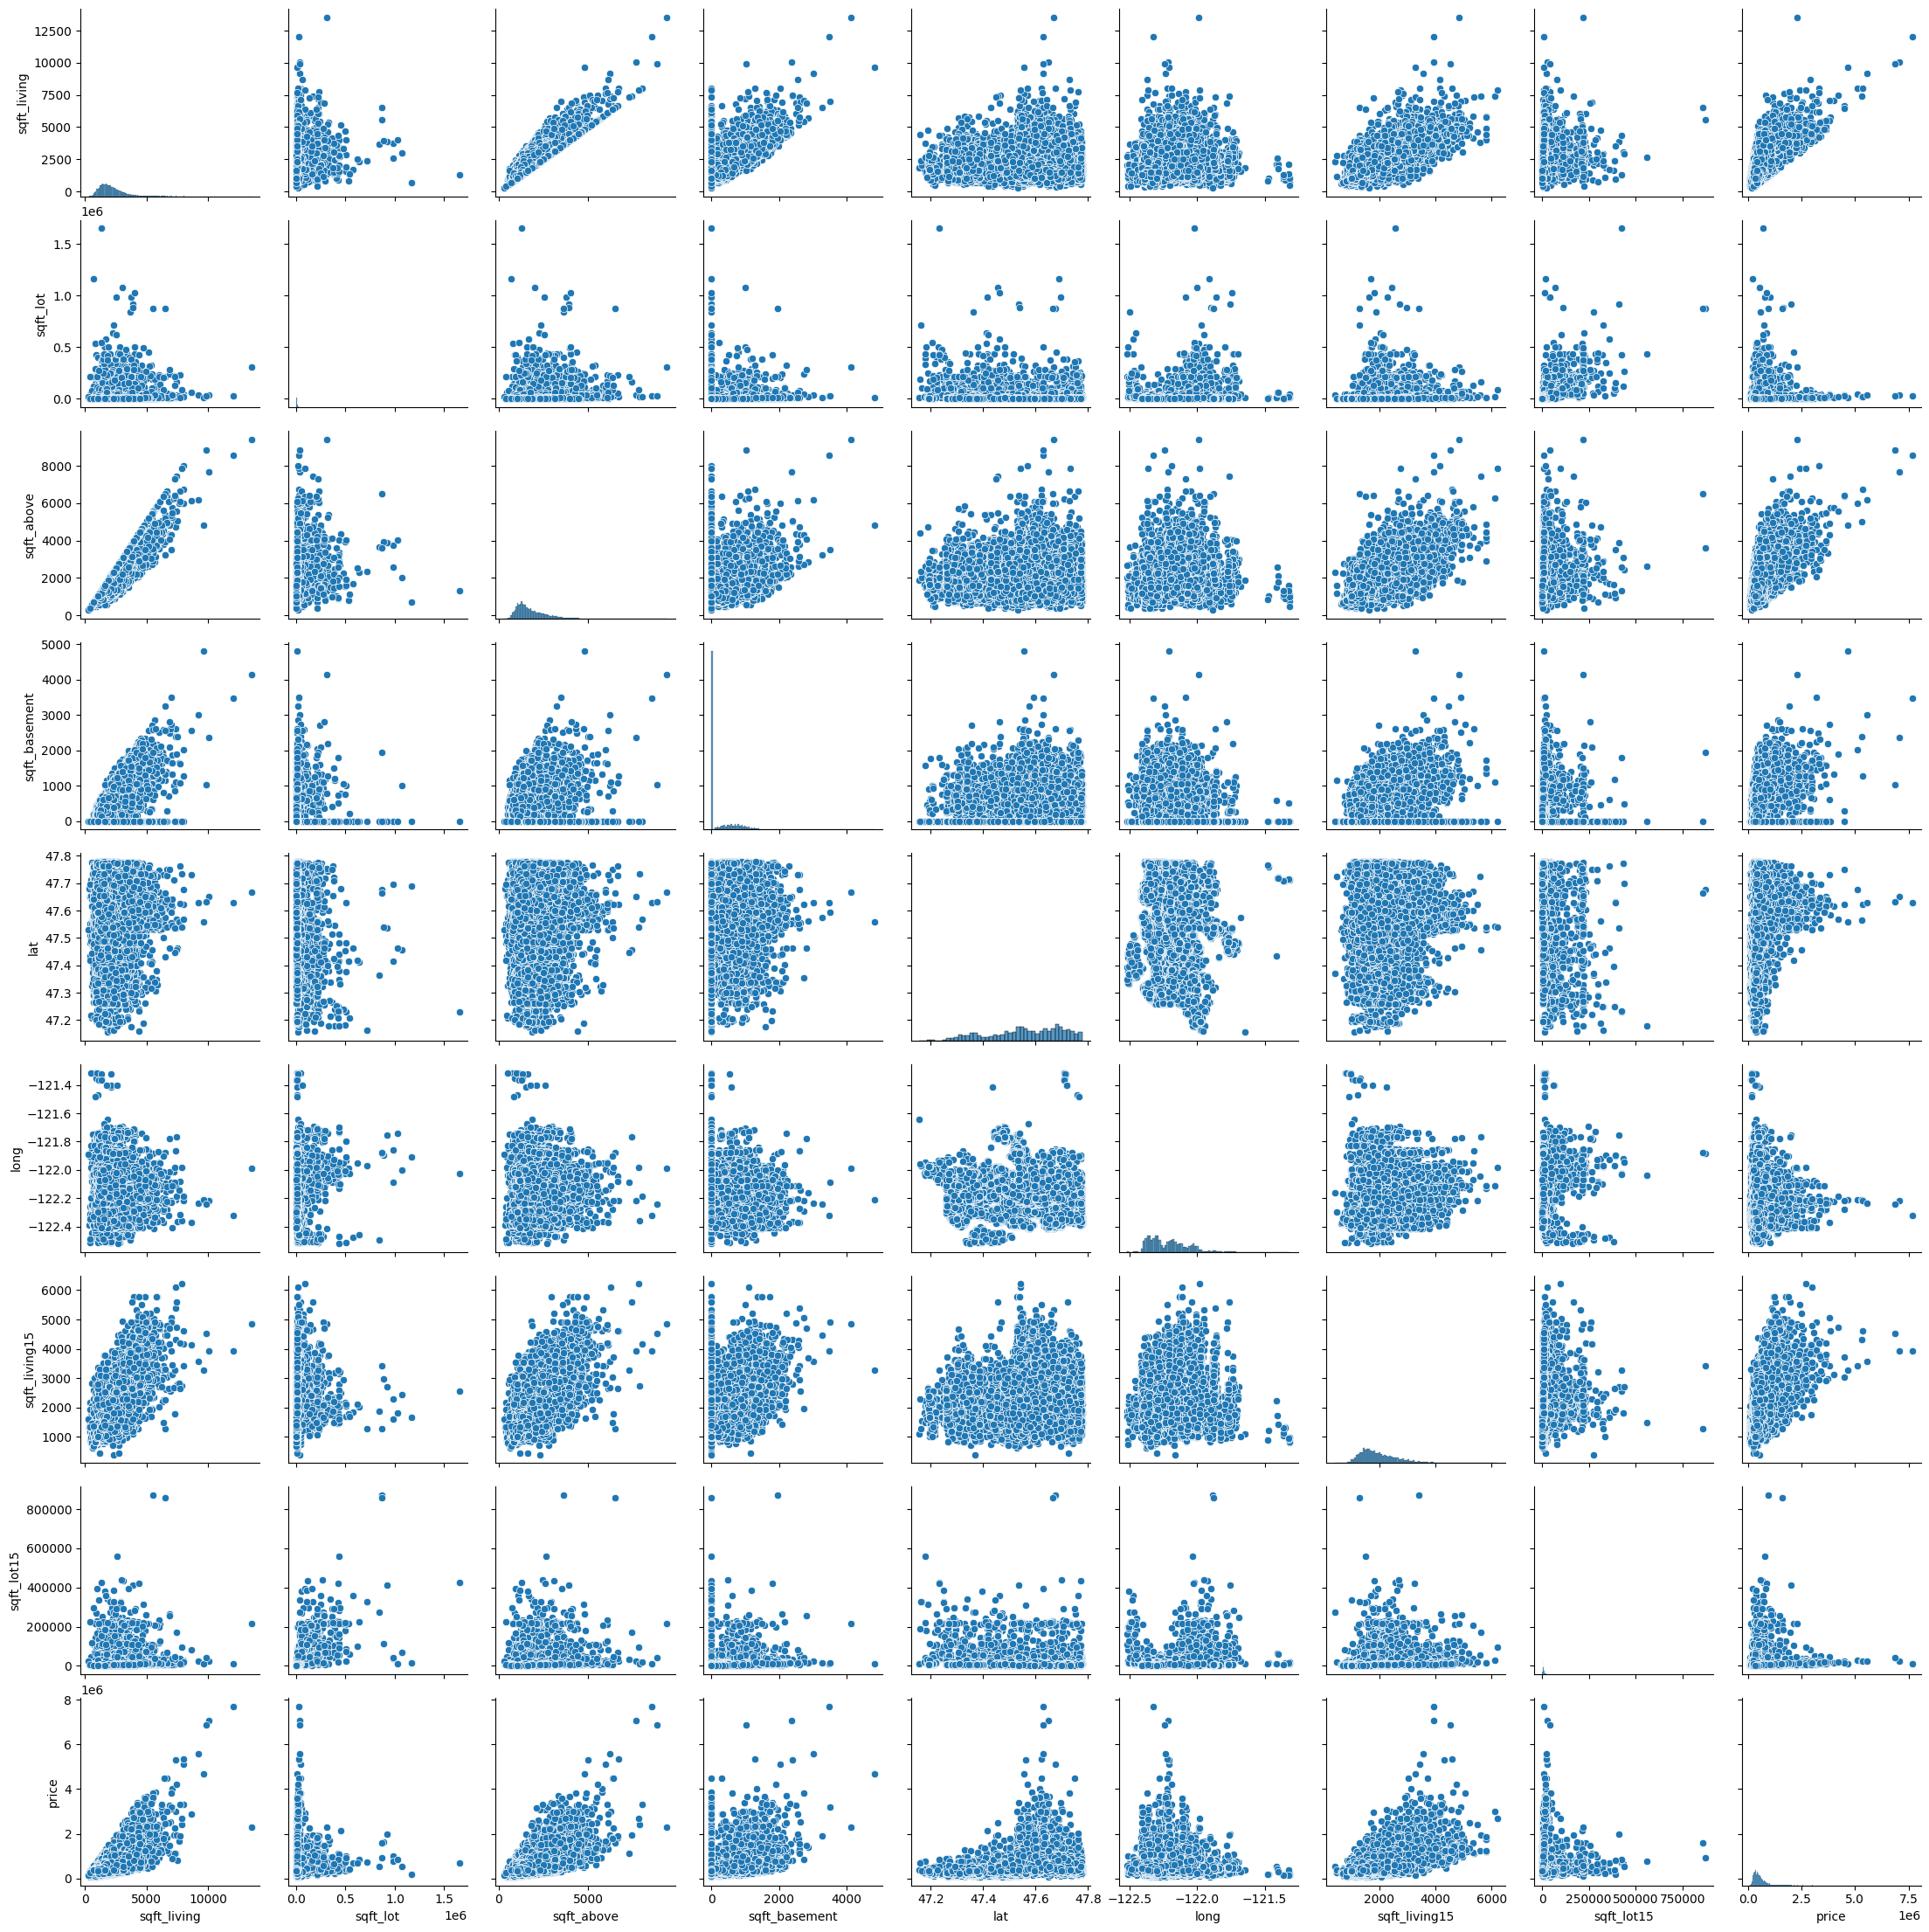

In [114]:
sc_features=['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15','price']
df_new=df[sc_features]

# Create a figsize
plt.figure(figsize=(10, 10))
sns.pairplot(df_new) #Plot
plt.show()

- From the above plots we are plotting few plot which seems to have a linear relationship.

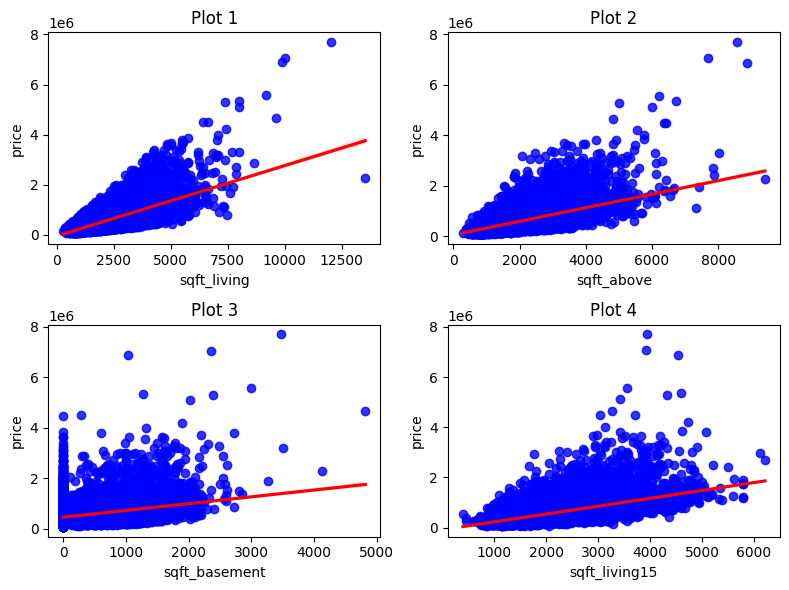

In [115]:
#Scatter plots of those features which seems to have a linear relationship with price.
fig, axes = plt.subplots(2, 2, figsize=(8, 6)) # create subplots

sns.regplot(x='sqft_living', y='price', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=axes[0,0])
axes[0, 0].set_title('Plot 1') # subplot 1

sns.regplot(x='sqft_above', y='price', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=axes[0,1])
axes[0, 1].set_title('Plot 2') # subplot 2

sns.regplot(x='sqft_basement', y='price', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=axes[1,0])
axes[1, 0].set_title('Plot 3') # subplot 3

sns.regplot(x='sqft_living15', y='price', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=axes[1,1])
axes[1, 1].set_title('Plot 4') # subplot 4

plt.tight_layout() # Adjust spacing between plots
plt.show()

From the above plots we can see a linear relationship between price and sqft_living, sqft_above, sqft_basement and sqdt_living15. It is linearly increasing relationships.

### Finding correlation values with price variable.

In [116]:
df.corr()['price'].sort_values()

zipcode         -0.052171
long             0.020571
condition        0.035089
yr_built         0.052967
sqft_lot15       0.082038
sqft_lot         0.088895
yr_renovated     0.127002
floors           0.256278
waterfront       0.266961
lat              0.306057
bedrooms         0.309007
sqft_basement    0.323552
view             0.396933
bathrooms        0.525453
sqft_living15    0.584688
sqft_above       0.605495
grade            0.667496
sqft_living      0.701993
price            1.000000
Name: price, dtype: float64

- From the correlation data we can observe that sqft_living has the highest correlation and thus explaind the distribution of the prices among houses the highest.

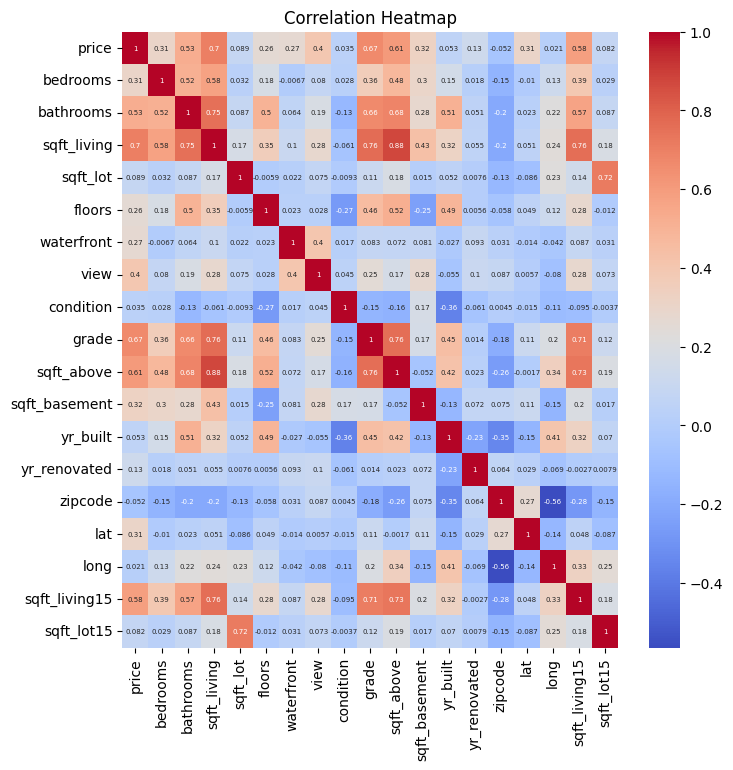

In [117]:
# Create a correlation heatmap using Seaborn
corr_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',annot_kws={'fontsize': 5})
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

### Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f73098ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f73099420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f73098c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f73099960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f73099c00>],
 'means': []}

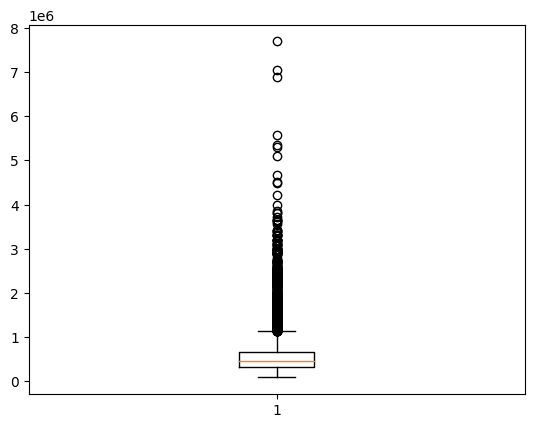

In [118]:
plt.boxplot(df['price'])

In [119]:
# Handling outliers of price variable.

from scipy import stats

z_scores = np.abs(stats.zscore(df['price']))
outliers = np.where(z_scores > 3)[0]
outliers_exist = np.isin(outliers, df.index)
out=outliers[outliers_exist]

df_new = df.drop(out,axis=0)

# Print the number of removed outlier rows
print(f"Number of removed outlier rows: {len(out)}")
print("Shape of df1 is ", df_new.shape)

Number of removed outlier rows: 400
Shape of df1 is  (21036, 19)


The outliers for the price columns were obtained from the z score of the price column. Z score is obtained by substracting the mean value from the data and dividing it by the standard deviation of the data. Anything more than 3 is termed as outlier. We obtained the row values of the outlier data and removed it from the dataframe. Thus the outliers were removed from the data.

# Model Development
In this section we will spilt the data and prepare it for model training.
Few models were selected based on our perception of solving a regression problem
## Models selected were
- Linear Regression
- Linear Regression with feature selection
- Linear regression with polynomial feature
- Ridge Regression
- SGD Regression Algorithm
- Parameters tunning.
- Random Forest
- Decision Tree
- DNN(Deep Neural Network)
- LTH (Lottery ticket Hypothesis)

For each model Test Accuracy score, Train accuracy score, Mean Square error and Square root mean square error is calculated and compared with each other to find the best model to predict the housing prices.

In [120]:
#Loading required libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

print("done")

done


### Spliting the data into train and test dataset

In [121]:
# We will split the data into training and testing sets:
features =["long","condition","yr_built","sqft_lot","yr_renovated","floors","waterfront","lat" ,"bedrooms" ,"sqft_basement" ,
           "view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df_new[features]
Y = df_new['price']
#Scaling the data
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
#Sliting into 80/20 ratio.
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

model_list=[]

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples: 4208
Number of training samples: 16828


## Linear Regression Model

In [122]:
#Fit a linear regression model to predict the 'price' using the list of features:
lm = LinearRegression().fit(x_train, y_train)
score_lm=lm.score(x_test, y_test)
score_train_lm=lm.score(x_train,y_train)

pred_test_lm=lm.predict(x_test)
mse_lm=mean_squared_error(y_test,pred_test_lm)
#r2_lm=r2_score(y_test,pred_lm)

model_list.append(["Linear_Regression",'{:.2%}'.format(score_lm),'{:.2%}'.format(score_train_lm),mse_lm,sqrt(mse_lm)])

print("Linear Regression model")
print('Test Score is ','{:.2%}'.format(score_lm))
print('Training Score is','{:.2%}'.format(score_train_lm))

Linear Regression model
Test Score is  68.35%
Training Score is 69.87%


## Using Pipelines

### Linear Regression with Feature selection

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('feature_selection', SelectKBest(k=14)),  # Select top k best features
    ('regression', LinearRegression())  # Linear regression model
])
pipe.fit(x_train,y_train)
pred_feat=pipe.predict(x_test)
score_feat=pipe.score(x_test,y_test)
score_train_feat=pipe.score(x_train,y_train)

mse_feat=mean_squared_error(y_test,pred_feat)
r2_feat=r2_score(y_test,pred_feat)

model_list.append(["Feature Selection(Linear)",'{:.2%}'.format(score_feat),'{:.2%}'.format(score_train_feat),mse_feat,sqrt(mse_feat)])

print("Linear Regression model with feature selection")
print("Number of features taken into account:",14)
print('Test Score is ','{:.2%}'.format(score_feat))
print('Training Score is','{:.2%}'.format(score_train_feat))


Linear Regression model with feature selection
Number of features taken into account: 14
Test Score is  68.21%
Training Score is 69.71%


## Linear Regression with polynomial features

In [124]:
from sklearn.preprocessing import PolynomialFeatures

pipe1 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),  # Create polynomial features of degree 2
    ('regression', LinearRegression())  # Linear regression model
])
pipe1.fit(x_train,y_train)
pred_poly=pipe1.predict(x_test)
score_poly=pipe1.score(x_test,y_test)
score_train_poly=pipe1.score(x_train,y_train)

mse_poly=mean_squared_error(y_test,pred_feat)
r2_poly=r2_score(y_test,pred_feat)

model_list.append(["Polynomial Features(degree=2)(Linear)",'{:.2%}'.format(score_poly),'{:.2%}'.format(score_train_poly),mse_poly,sqrt(mse_poly)])

print("Linear Regression model with Polynomial features")
print("The degree of polynomial feature considered is 2 ")
print('Test Score is ','{:.2%}'.format(score_lm))
print('Training Score is','{:.2%}'.format(score_train_lm))

Linear Regression model with Polynomial features
The degree of polynomial feature considered is 2 
Test Score is  68.35%
Training Score is 69.87%


## Ridge Regression

In [125]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha=0.1).fit(x_train, y_train)
pred_rr=RR.predict(x_test)
score_rr=RR.score(x_test, y_test)
score_train_rr=RR.score(x_train, y_train)

mse_rr=mean_squared_error(y_test,pred_rr)
r2_rr=r2_score(y_test,pred_rr)


model_list.append(["Ridge Regression",'{:.2%}'.format(score_rr),'{:.2%}'.format(score_train_rr),mse_rr,sqrt(mse_rr)])

print("Ridge Regression model")
print('Test Score is ','{:.2%}'.format(score_rr))
print('Training Score is','{:.2%}'.format(score_train_rr))

Ridge Regression model
Test Score is  68.35%
Training Score is 69.87%


## SGD Regression Algorithm

In [126]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
score_sgd=sgd.score(x_test,y_test)
score_train_sgd=sgd.score(x_train,y_train)

mse_sgd=mean_squared_error(y_test,pred_sgd)
r2_sgd=r2_score(y_test,pred_sgd)

model_list.append(["SGD Regression",'{:.2%}'.format(score_sgd),'{:.2%}'.format(score_train_sgd),mse_sgd,sqrt(mse_sgd)])

print("SGD Regression model")
print('Test Score is ','{:.2%}'.format(score_sgd))
print('Training Score is','{:.2%}'.format(score_train_sgd))

SGD Regression model
Test Score is  68.29%
Training Score is 69.67%


## Tuning Model parameters to get high accuracy

In [127]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import  GridSearchCV
# Define the hyperparameters to tune
params = {
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1]

}
# Use GridSearchCV to tune the hyperparameters
grid = GridSearchCV(sgd, params, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 0.001, 'learning_rate': 'invscaling', 'penalty': 'l2'}


In [128]:
# Use the best hyperparameters to train the model
sgd = SGDRegressor(**grid.best_params_)
sgd.fit(x_train, y_train)

# Evaluate the model on the testing set
y_pred = sgd.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
sgd_r3 = r2_score(y_test, y_pred)
print(f"Mean squared error = {mse}")
print(f"R2 = {round(sgd_r3*100)} % ")

Mean squared error = 43459452018.9021
R2 = 68 % 


## Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(x_train, y_train)
pred_rfg=rfg_model.predict(x_test)

score_rfg=rfg_model.score(x_test,y_test)
score_train_rfg=rfg_model.score(x_train,y_train)

mse_rfg=mean_squared_error(y_test,pred_rfg)
r2_rfg=r2_score(y_test,pred_rfg)

model_list.append(["Random Forest",'{:.2%}'.format(score_rfg),'{:.2%}'.format(score_train_rfg),mse_rfg,sqrt(mse_rfg)])

print("Random Forest model")
print('Test Score is ','{:.2%}'.format(score_rfg))
print('Training Score is','{:.2%}'.format(score_train_rfg))

Random Forest model
Test Score is  89.20%
Training Score is 98.22%


## DecisionTree

In [130]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=8)

dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)

score_dtr=dtr.score(x_test,y_test)
score_train_dtr=dtr.score(x_train,y_train)

mse_dtr = mean_squared_error(y_test, pred_dtr)


model_list.append(["Decission Tree",'{:.2%}'.format(score_dtr),'{:.2%}'.format(score_train_dtr),mse_dtr,sqrt(mse_dtr)])

print("Decision Tree model")
print('Test Score is ','{:.2%}'.format(score_dtr))
print('Training Score is','{:.2%}'.format(score_train_dtr))

Decision Tree model
Test Score is  81.57%
Training Score is 86.36%


## DNN(Deep Neural Network) Model

In [131]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model with three hidden layers with 64,32 and 32 neuron's.
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=400, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/400
132/132 [==============================] - 1s 4ms/step - loss: 429548765184.0000 - val_loss: 424242872320.0000
Epoch 2/400
132/132 [==============================] - 0s 3ms/step - loss: 426287955968.0000 - val_loss: 414841143296.0000
Epoch 3/400
132/132 [==============================] - 0s 3ms/step - loss: 400393437184.0000 - val_loss: 366420099072.0000
Epoch 4/400
132/132 [==============================] - 1s 4ms/step - loss: 318873796608.0000 - val_loss: 254058872832.0000
Epoch 5/400
132/132 [==============================] - 1s 5ms/step - loss: 192922124288.0000 - val_loss: 133308940288.0000
Epoch 6/400
132/132 [==============================] - 1s 5ms/step - loss: 106102571008.0000 - val_loss: 85326716928.0000
Epoch 7/400
132/132 [==============================] - 1s 5ms/step - loss: 82022703104.0000 - val_loss: 75790286848.0000
Epoch 8/400
132/132 [==============================] - 1s 4ms/step - loss: 75366440960.0000 - val_loss: 71651565568.0000
Epoch 9/400
132/132 [

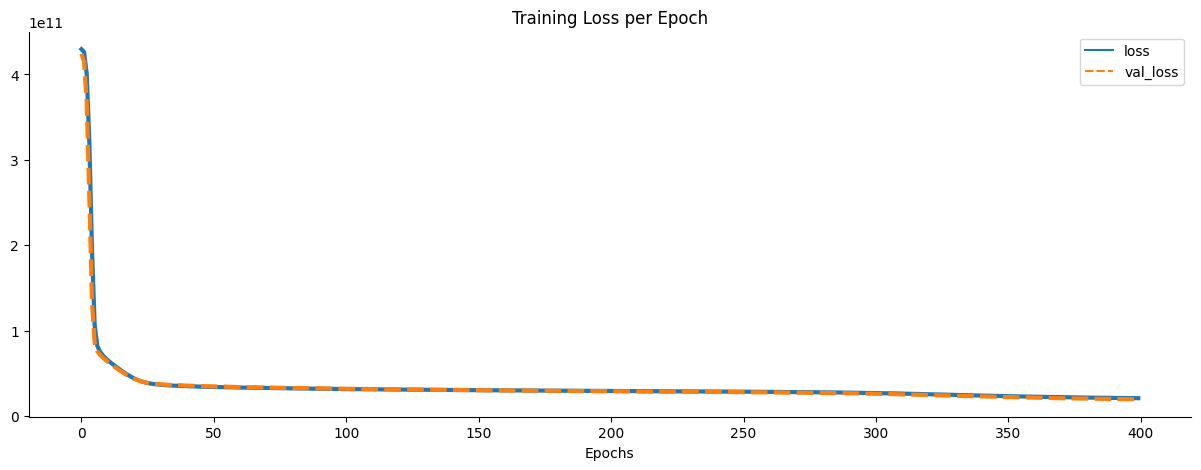

In [132]:
import seaborn as sns
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [133]:

from sklearn.metrics import explained_variance_score
pred_dnn=model.predict(x_test)
explained_var=explained_variance_score(y_test,pred_dnn)

pred_train_dnn=model.predict(x_train)
explained_train_var=explained_variance_score(y_train,pred_train_dnn)

mse_dnn=mean_squared_error(y_test,pred_dnn)
r2_dnn=r2_score(y_test,pred_dnn)
print(explained_var)
print(explained_train_var)
print(mse_dnn)

model_list.append(["DNN",'{:.2%}'.format(explained_var),'{:.2%}'.format(explained_train_var),mse_dnn,sqrt(mse_dnn)])

526/526 [==============================] - 1s 1ms/step
0.8553136287036893
0.8476887753211885
19607679776.82317


## Model prediction vs perfect fit

<ipython-input-134-1db53a811bb0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


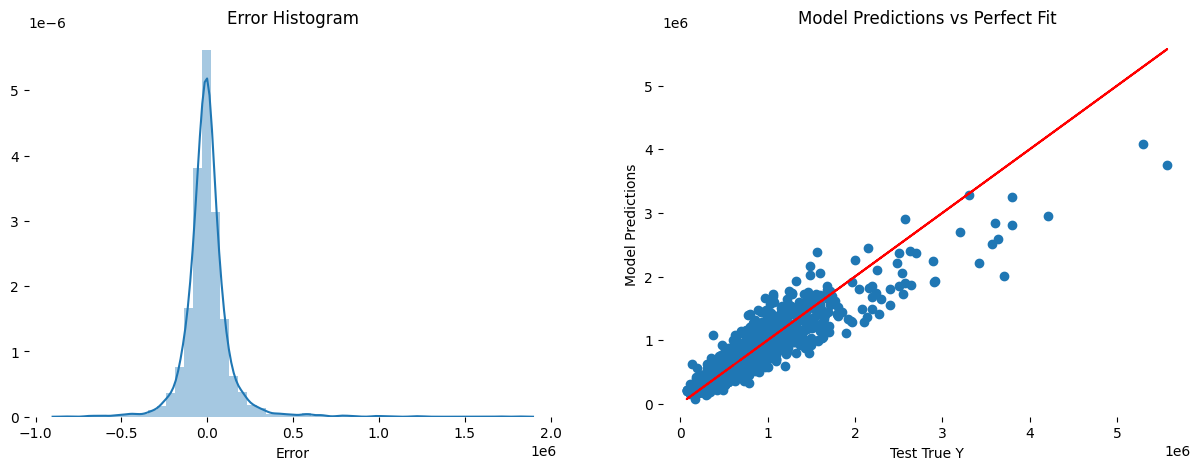

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(1, 2, figsize=(15, 5))

# Our model predictions
plt.scatter(y_test, pred_dnn)

# Perfect predictions
plt.plot(y_test, y_test, 'r')

errors = y_test.values.reshape(-1, 1) - pred_dnn.reshape(-1, 1)
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

plt.show()


This plot shows the training loss per epoch.
This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time.

Model predictions vs perfect fit
We can compare the model predictions with a perfect fit to see how accurate the model is.
The red line represents the perfect prediction.
We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.
On the other hand, our model is good predicting the price of houses between 0 and \$2 million. There is clearly a good fit.
It may be worth it retraining our model just on price houses below \$3 million.

## Layer transfer learning using sequential tasks with dense neural network

In [135]:
import numpy as np
from tensorflow import keras
from keras import layers

# Define the base model
base_model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the base model
base_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the base model
base_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions with the base model
y_train_pred_base = base_model.predict(x_train)
y_test_pred_base = base_model.predict(x_test)

# Calculate MSE with the base model
mse_train_base = mean_squared_error(y_train, y_train_pred_base)
mse_test_base = mean_squared_error(y_test, y_test_pred_base)


smse_train_base = np.sqrt(mse_train_base)
smse_test_base = np.sqrt(mse_test_base)

print("MSE for training data (Base Model):", mse_train_base)
print("MSE for testing data (Base Model):", mse_test_base)
print("SMSE for training data (Base Model):", smse_train_base)
print("SMSE for testing data (Base Model):", smse_test_base)


# Implement LTH
n_tasks = 3  # Number of sequential tasks

# Initialize transfer model
transfer_model = keras.Sequential()

# Copy weights from the base model to the transfer model
for layer in base_model.layers:
    transfer_model.add(layer)

# Freeze the weights of the transfer model
transfer_model.trainable = False

# Train the transfer model for each task sequentially
mse_train_lth = []
mse_test_lth = []
smse_train_lth = []
smse_test_lth = []

for task in range(n_tasks):
    # Add a task-specific output layer to the transfer model
    transfer_model.add(layers.Dense(1))

    # Compile the transfer model for the current task
    transfer_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the transfer model for the current task
    transfer_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions with the transfer model for the current task
    y_train_pred_lth = transfer_model.predict(x_train)
    y_test_pred_lth = transfer_model.predict(x_test)

    # Calculate MSE with the transfer model for the current task
    mse_train_lth.append(mean_squared_error(y_train, y_train_pred_lth))
    mse_test_lth.append(mean_squared_error(y_test, y_test_pred_lth))

    # Calculate SMSE with the transfer model for the current task
    smse_train_lth.append(np.sqrt(mse_train_lth[task]))
    smse_test_lth.append(np.sqrt(mse_test_lth[task]))

    print("MSE for training data (Transfer Model - Task", task + 1, "):", mse_train_lth[task])
    print("MSE for testing data (Transfer Model - Task", task + 1, "):", mse_test_lth[task])
    print("SMSE for training data (Transfer Model - Task", task + 1, "):", smse_train_lth[task])
    print("SMSE for testing data (Transfer Model - Task", task + 1, "):", smse_test_lth[task])
#This model is trained using a base model and then extended for sequential tasks using transfer learning.
#The metrics used to evaluate the model's performance are mean squared error (MSE) and square root of mean squared error (SMSE).


132/132 [==============================] - 0s 1ms/step
MSE for training data (Base Model): 28813299534.95084
MSE for testing data (Base Model): 28692748038.183205
SMSE for training data (Base Model): 169744.80709273802
SMSE for testing data (Base Model): 169389.33862018355
132/132 [==============================] - 0s 1ms/step
MSE for training data (Transfer Model - Task 1 ): 29012382886.828533
MSE for testing data (Transfer Model - Task 1 ): 28896516254.97966
SMSE for training data (Transfer Model - Task 1 ): 170330.217186583
SMSE for testing data (Transfer Model - Task 1 ): 169989.75338231318
132/132 [==============================] - 0s 1ms/step
MSE for training data (Transfer Model - Task 2 ): 942292063525.6149
MSE for testing data (Transfer Model - Task 2 ): 931486751826.3453
SMSE for training data (Transfer Model - Task 2 ): 970717.2933071785
SMSE for testing data (Transfer Model - Task 2 ): 965135.6131789695
132/132 [==============================] - 0s 2ms/step
MSE for training

In [136]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the metrics for the last task
last_task = n_tasks - 1
last_task_train_pred = transfer_model.predict(x_train)
last_task_test_pred = transfer_model.predict(x_test)

mse_last_task_train = mean_squared_error(y_train, last_task_train_pred)
mse_last_task_test = mean_squared_error(y_test, last_task_test_pred)
smse_last_task_train = np.sqrt(mse_last_task_train)
smse_last_task_test = np.sqrt(mse_last_task_test)
r2_last_task_train = r2_score(y_train, last_task_train_pred)
r2_last_task_test = r2_score(y_test, last_task_test_pred)

print("MSE for training data (Last Task):", mse_last_task_train)
print("MSE for testing data (Last Task):", mse_last_task_test)
print("SMSE for training data (Last Task):", smse_last_task_train)
print("SMSE for testing data (Last Task):", smse_last_task_test)
print("R2 score for training data (Last Task):", r2_last_task_train)
print("R2 score for testing data (Last Task):", r2_last_task_test)

132/132 [==============================] - 0s 1ms/step
MSE for training data (Last Task): 1136357041650.0554
MSE for testing data (Last Task): 1123380185909.8284
SMSE for training data (Last Task): 1066000.4885787133
SMSE for testing data (Last Task): 1059896.3090367983
R2 score for training data (Last Task): -7.354568861343232
R2 score for testing data (Last Task): -7.289503637627371


In [137]:
model_list.append(["LTSE_DNN",'{:.2%}'.format(r2_last_task_test),'{:.2%}'.format(r2_last_task_train),mse_last_task_test,sqrt(mse_last_task_test)])

## Model Comparison Table


In [138]:
model_comparison=pd.DataFrame(model_list, columns=['Model','Test Score','Train Score','MSE','SMSE'])
model_comparison

,Model,Test Score,Train Score,MSE,SMSE
0,Linear_Regression,68.35%,69.87%,4.288525e+10,2.070876e+05
1,Feature Selection(Linear),68.21%,69.71%,4.307811e+10,2.075527e+05
2,Polynomial Features(degree=2)(Linear),81.39%,81.35%,4.307811e+10,2.075527e+05
3,Ridge Regression,68.35%,69.87%,4.288524e+10,2.070875e+05
4,SGD Regression,68.29%,69.67%,4.296952e+10,2.072909e+05
5,Random Forest,89.20%,98.22%,1.463338e+10,1.209685e+05
6,Decission Tree,81.57%,86.36%,2.497510e+10,1.580351e+05
7,DNN,85.53%,84.77%,1.960768e+10,1.400274e+05
8,LTSE_DNN,-728.95%,-735.46%,1.123380e+12,1.059896e+06


CONCLUSION:

The Random Forest model stands out as the top performer for predicting king house sales, with a high test score of 88.97%, low MSE of 1.495421e+10, and a strong train score of 98.27%. 
The DNN model also shows good performance, with a test score of 84.99% and low MSE of 2.036886e+10. 
The Polynomial Features (degree=2) (Linear) model offers an alternative by capturing non-linear relationships, achieving a test score of 81.39% and a train score of 81.35%. 
Other models, including Linear Regression, Ridge Regression, polynomial Feature Selection (Linear), and SGD Regression, show lower performance. And the transfer learning using sequential task with dense neural network model is too complex to identify pattern in our dataset.
Thus, the Random Forest, DNN, and Polynomial Features models are recommended for further evaluation, considering factors like interpretability and computational complexity.
